# RATINGS PREDICTION PROJECT:

## PROBLE STATEMENT:

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

1)Data Collection Phase:
You have to scrape at least 20000 rows of data. You can scrape more data as well, it’s up to you. more the data better the model In this section you need to scrape the reviews of different laptops, Phones, Headphones, smart watches, Professional Cameras, Printers, Monitors, Home theater, Router from different ecommerce websites. Basically, we need these columns

1) reviews of the product.
2) rating of the product.
You can fetch other data as well, if you think data can be useful or can help in the project.It completely depends on your imagination or assumption.

2)Model Building Phase:
After collecting the data, you need to build a machine learning model. Before model building do all data preprocessing steps involving NLP. Try different models with different hyper parameters and select the best model. Follow the complete life cycle of data science. Include all the steps like

1. Data Cleaning
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Building
5. Model Evaluation
6. Selecting the best model

### Importing Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import defaultdict, Counter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

### Importing Scrapped Data:

In [2]:
Rating=pd.read_csv('Reviews.csv',encoding='latin-1')
Rating.head()

,Unnamed: 0,Ratings,Full_review
0,0,5,Good product as used of now.... Everything is ...
1,1,5,AWESOME LAPTOP. It supports many high spec gam...
2,2,4,For the peoples who R going to buy R they buye...
3,3,5,It's good gameing laptop in this price Display...
4,4,4,Best laptop in this price range... Believe me ...


### Exploratory Data Analysis[EDA]:

In [3]:
#dropping the Unnamed: 0 column
Rating.drop('Unnamed: 0', axis =1, inplace = True)

In [4]:
Rating.shape

(33294, 2)

Here we have 33294 rows and 2 columns.

In [5]:
Rating.columns

Index(['Ratings', 'Full_review'], dtype='object')

Here we can see the column of the datasets.

In [6]:
Rating.dtypes

Ratings         int64
Full_review    object
dtype: object

This dataset has only 2 datatypes.

In [7]:
Rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33294 entries, 0 to 33293
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ratings      33294 non-null  int64 
 1   Full_review  33294 non-null  object
dtypes: int64(1), object(1)
memory usage: 520.3+ KB


Here we can see don't have any null values in the dataset.

In [8]:
Rating.isnull().sum()

Ratings        0
Full_review    0
dtype: int64

There are no null values.

<AxesSubplot:>

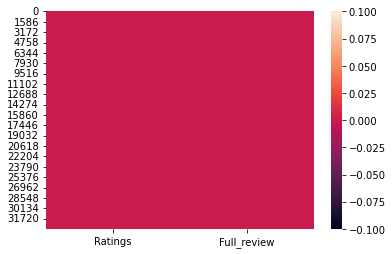

In [9]:
sns.heatmap(Rating.isnull())

In [10]:
Rating.nunique()

Ratings            5
Full_review    19923
dtype: int64

### Text Processing:

In [11]:
#convert text to lowercase
Rating['Full_review']=Rating['Full_review'].str.lower()

In [12]:
Rating['Full_review']=Rating['Full_review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

Rating['Full_review']=Rating['Full_review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

Rating['Full_review']=Rating['Full_review'].str.replace(r'£|\$', 'dollers')

Rating['Full_review']=Rating['Full_review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

Rating['Full_review']=Rating['Full_review'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [13]:
Rating['Full_review']=Rating['Full_review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

Rating['Full_review']=Rating['Full_review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

Rating['Full_review']=Rating['Full_review'].str.replace(r'£|\$', 'dollers')

Rating['Full_review']=Rating['Full_review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

Rating['Full_review']=Rating['Full_review'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [14]:
Rating['length']=Rating.Full_review.str.len()
Rating.head()

,Ratings,Full_review,length
0,5,good product as used of now.... everything is ...,271
1,5,awesome laptop. it supports many high spec gam...,100
2,4,for the peoples who r going to buy r they buye...,531
3,5,it's good gameing laptop in this price display...,106
4,4,best laptop in this price range... believe me ...,523


In [15]:
Rating.head()

,Ratings,Full_review,length
0,5,good product as used of now.... everything is ...,271
1,5,awesome laptop. it supports many high spec gam...,100
2,4,for the peoples who r going to buy r they buye...,531
3,5,it's good gameing laptop in this price display...,106
4,4,best laptop in this price range... believe me ...,523


In [16]:
Rating['clean_length'] = Rating.Full_review.str.len()

In [17]:
Rating.head()

,Ratings,Full_review,length,clean_length
0,5,good product as used of now.... everything is ...,271,271
1,5,awesome laptop. it supports many high spec gam...,100,100
2,4,for the peoples who r going to buy r they buye...,531,531
3,5,it's good gameing laptop in this price display...,106,106
4,4,best laptop in this price range... believe me ...,523,523


### Visualization:

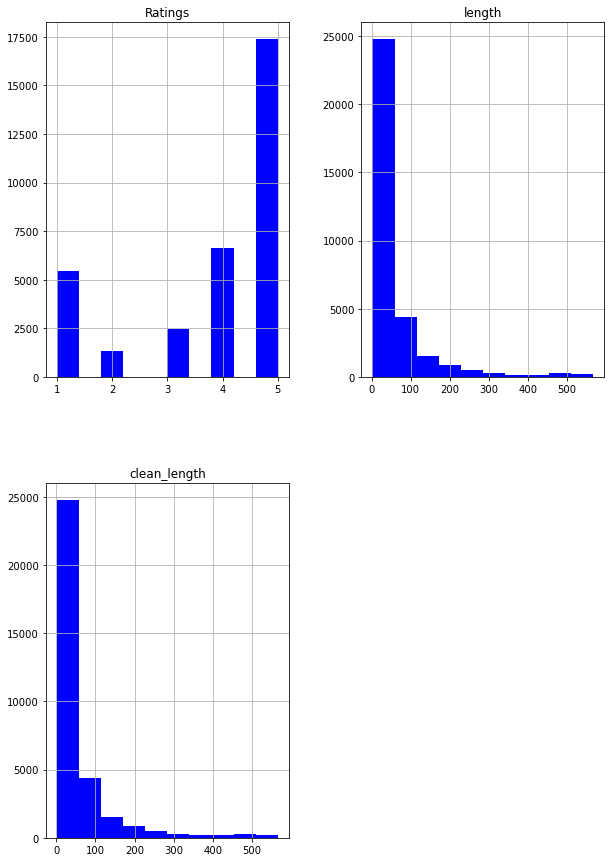

In [18]:
Rating.hist(figsize=(10,15),color = 'blue');

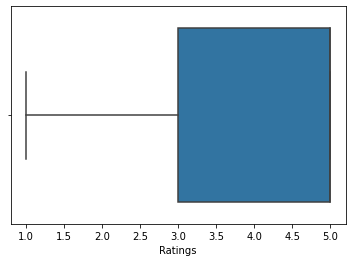

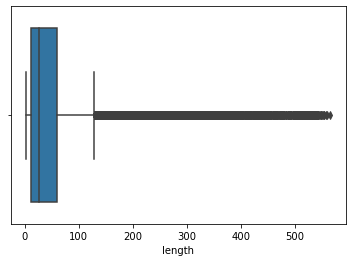

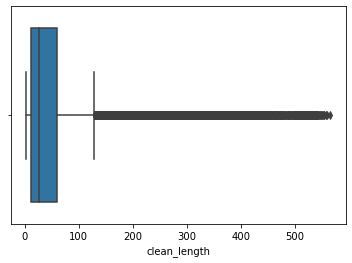

In [19]:
for i in Rating.describe().columns:
    sns.boxplot(Rating[i])
    plt.show()

Here we observed that except ratings all have outliers.

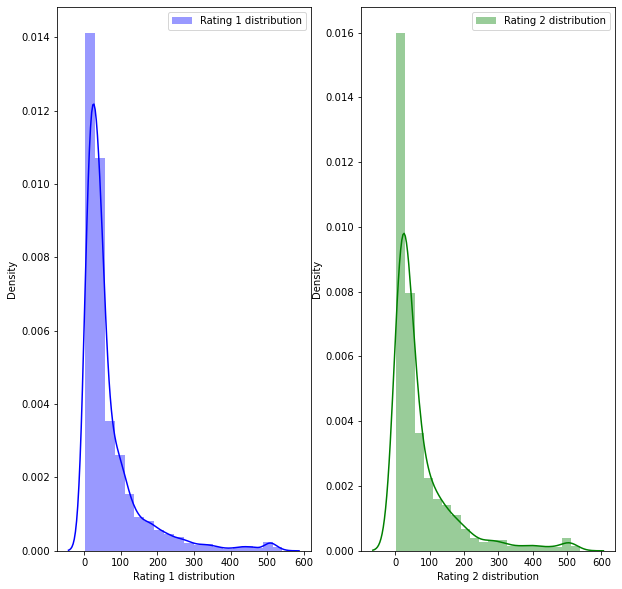

In [20]:
#message distribution before cleaning

f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='b')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==2]['length'],bins=20,ax=ax[1],label='Rating 2 distribution',color='g')
ax[1].set_xlabel('Rating 2 distribution')
ax[1].legend()

plt.show()

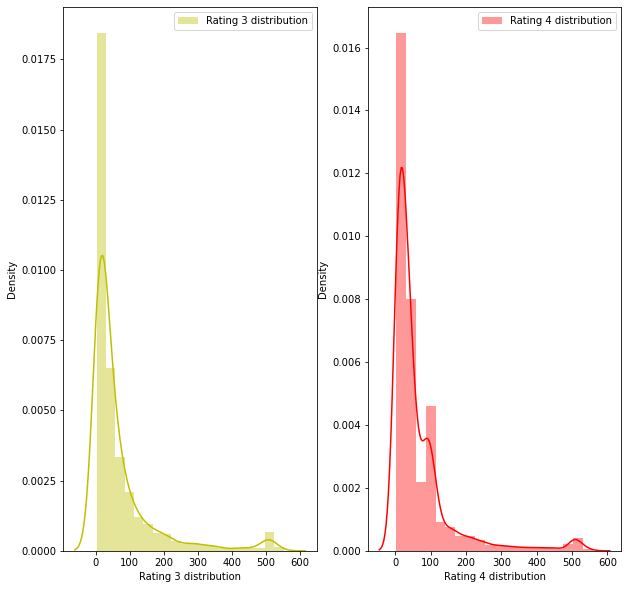

In [21]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==3]['length'],bins=20,ax=ax[0],label='Rating 3 distribution',color='y')
ax[0].set_xlabel('Rating 3 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==4]['length'],bins=20,ax=ax[1],label='Rating 4 distribution',color='r')
ax[1].set_xlabel('Rating 4 distribution')
ax[1].legend()

plt.show()


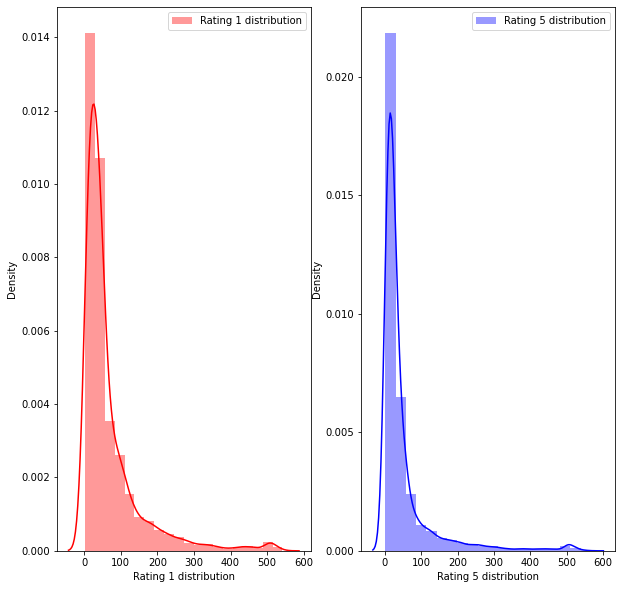

In [22]:
f,ax = plt.subplots(1,2,figsize=(10,10))

sns.distplot(Rating[Rating['Ratings']==1]['length'],bins=20,ax=ax[0],label='Rating 1 distribution',color='r')
ax[0].set_xlabel('Rating 1 distribution')
ax[0].legend()

sns.distplot(Rating[Rating['Ratings']==5]['length'],bins=20,ax=ax[1],label='Rating 5 distribution',color='b')
ax[1].set_xlabel('Rating 5 distribution')
ax[1].legend()

plt.show()

5    17373
4     6655
1     5465
3     2447
2     1354
Name: Ratings, dtype: int64


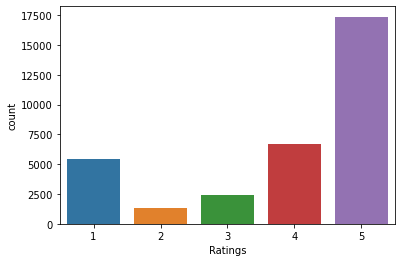

In [25]:
#lets Check the count of target column again
sns.countplot(Rating['Ratings'])
print(Rating.Ratings.value_counts())
plt.show()

### Top 30 frequently occuring words:

In [26]:
#Top 30 most frequently occuring words

#function to plot most frequent terms

def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

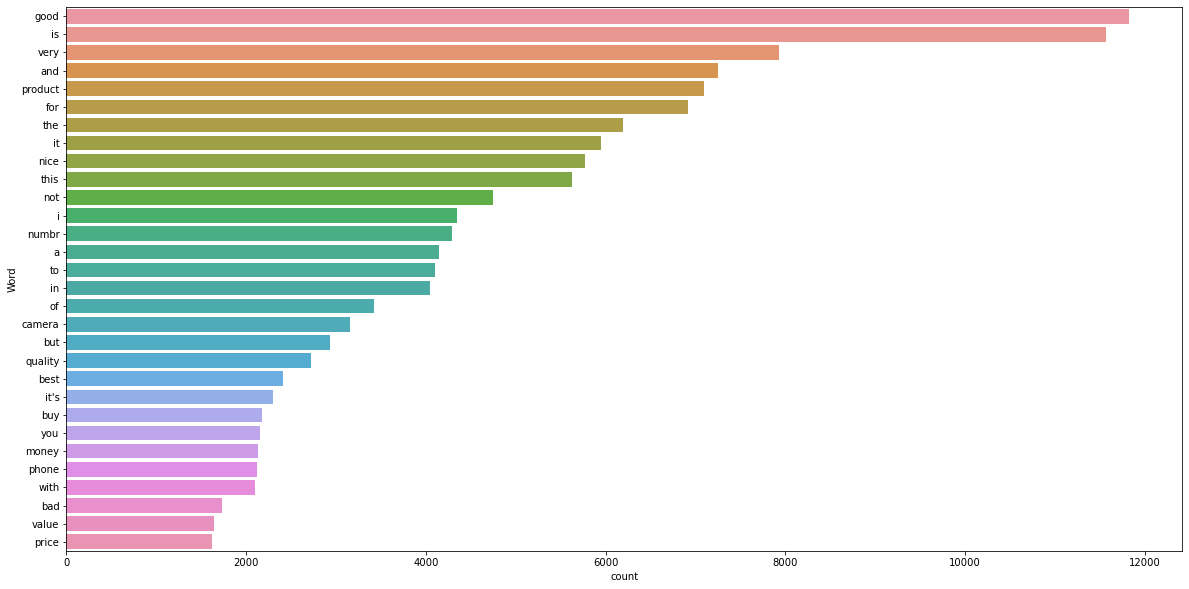

In [27]:
freq_words(Rating['Full_review'])

### Top 30 rare words:

In [28]:
#Top 30 Rare words

#function to plot least frequent terms

def rare_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nsmallest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

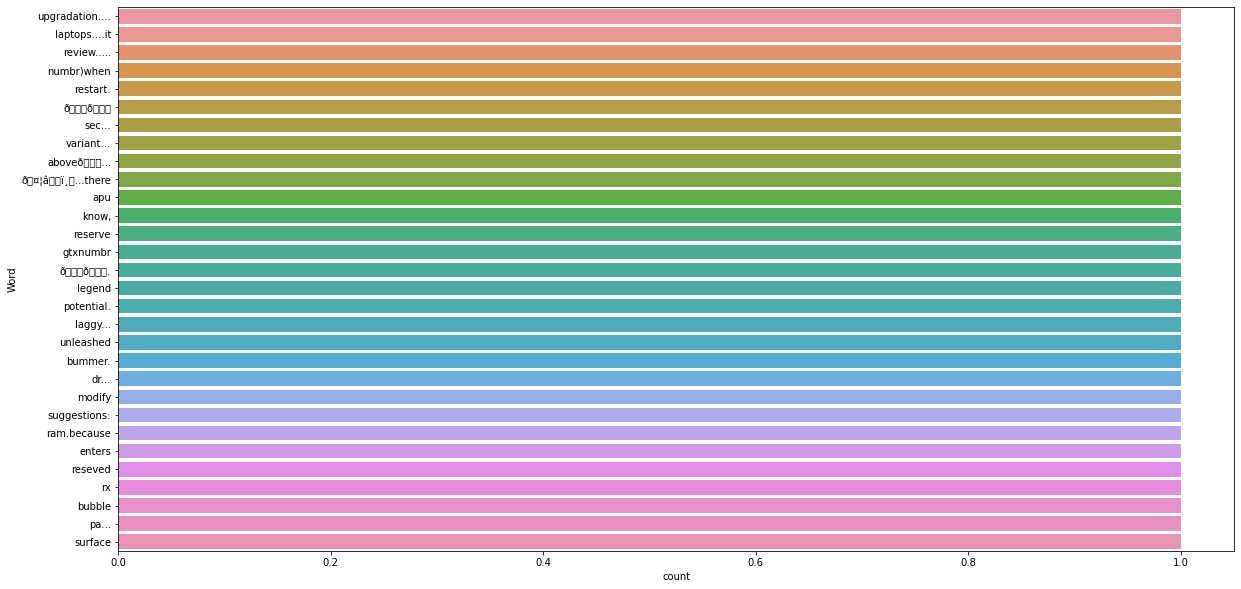

In [29]:
rare_words(Rating['Full_review'])

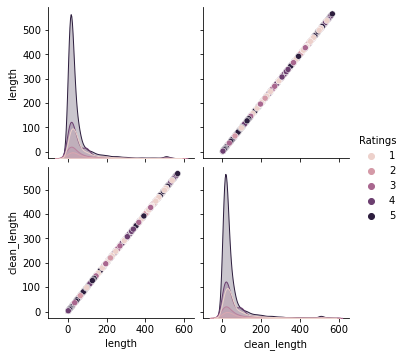

In [30]:
sns.pairplot(Rating,hue="Ratings")

### Converting data into vectors using Tdif Vectorizer:

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec=TfidfVectorizer()
feature1=tf_vec.fit_transform(Rating['Full_review'])

### Model Building and Evaluation:

In [32]:
x=feature1
y=Rating['Ratings']

### Splitting the data into train and test:

In [33]:
#splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=9)

### Data Balancing:

In [34]:
#lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (26635, 9823)
x_test (6659, 9823)
y_train (26635,)
y_test (6659,)


In [35]:
#Importing all the model library

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#Importing Boosting models

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [36]:
# Defining the algorithms
KNN=KNeighborsClassifier(n_neighbors=6)
DT=DecisionTreeClassifier(random_state=6)

RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()
models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))

models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))

****************************************** KNeighborsClassifier ********************************************************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.5720078089803273


Cross_Val_Score =  0.597724780953979


classification_report
               precision    recall  f1-score   support

           1       0.68      0.66      0.67      1078
           2       0.11      0.09      0.10       270
           3       0.23      0.10      0.14       489
           4       0.33      0.52      0.40      1316
           5       0.76      0.67      0.71      3506

    accuracy                           0.57      6659
   macro avg       0.42      0.41      0.40      6659
weighted avg       0.60      0.57      0.58      6659



[[ 713   97   27  174   67]
 [ 125   25   23   74   23]
 [  89   39   47  179  135]
 [  33   30   55  679  519]
 [  82   43   54  982 2345]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** DecisionTreeCla

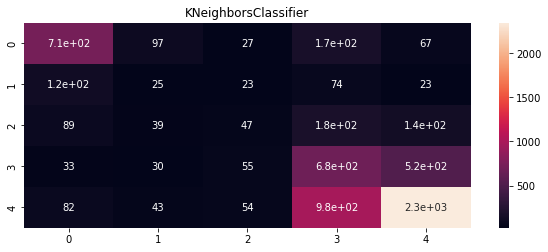

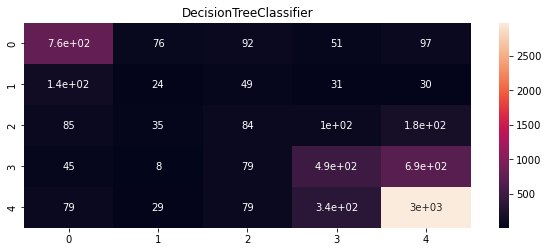

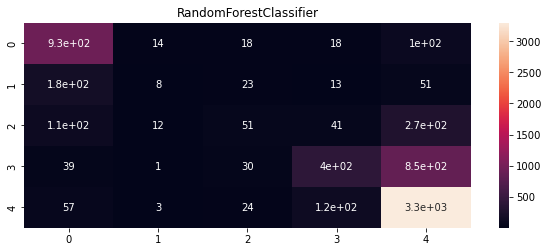

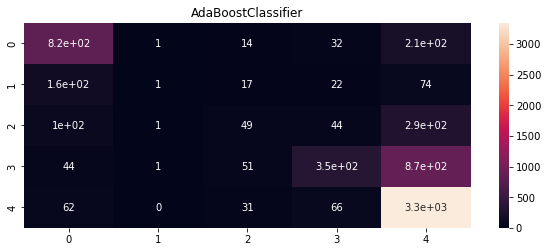

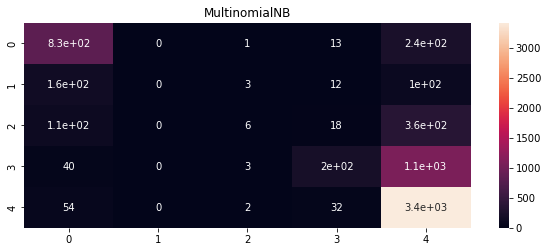

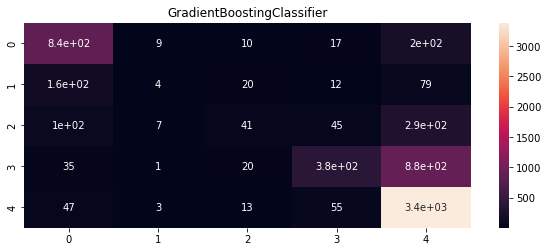

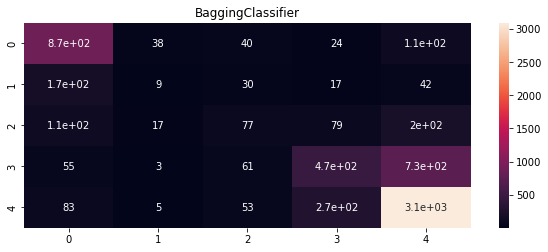

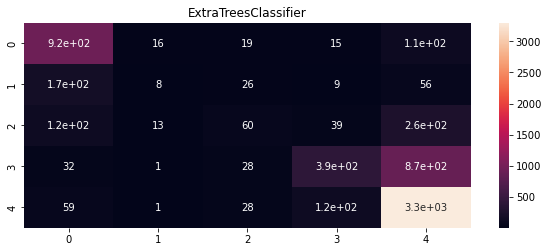

In [37]:
Model= []
score= []
cvs=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc= cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')

In [38]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,57.200781,59.772478
1,DecisionTreeClassifier,65.129899,64.133656
2,RandomForestClassifier,70.325875,69.549111
3,AdaBoostClassifier,68.628923,67.272601
4,MultinomialNB,66.901937,66.494908
5,GradientBoostingClassifier,69.920408,69.065567
6,BaggingClassifier,67.742904,67.434668
7,ExtraTreesClassifier,70.190719,69.266770


### HyperParameter Tuning:

In [39]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth': [80, 90, 100], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]}
rfc=RandomForestClassifier()

clf=GridSearchCV(rfc,parameters,cv=5,n_jobs=-1)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 100, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 1000}


In [40]:
#RandomForesetClassifier with best parameters

rfc=RandomForestClassifier(max_depth=100, min_samples_leaf=3, min_samples_split=8, n_estimators=1000)
rfc.fit(x_train,y_train)
rfc.score(x,y)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.6939480402462832
[[ 859    0    0    1  218]
 [ 167    0    0    1  102]
 [ 113    0    1    3  372]
 [  39    0    0  306  971]
 [  49    0    0    2 3455]]
              precision    recall  f1-score   support

           1       0.70      0.80      0.75      1078
           2       0.00      0.00      0.00       270
           3       1.00      0.00      0.00       489
           4       0.98      0.23      0.38      1316
           5       0.68      0.99      0.80      3506

    accuracy                           0.69      6659
   macro avg       0.67      0.40      0.39      6659
weighted avg       0.74      0.69      0.62      6659



### Model Saving:

In [43]:
#saving our model

import joblib
joblib.dump(RF,'Ratings_prediction.pkl')

['Ratings_prediction.pkl']